In [33]:
import tensorflow as tf

In [34]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import imutils
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

### Image acquisition 🖼️

In [35]:
#Image acquisition 'Training- Testing'
Training = "Training/"

Testing = "Testing/"

In [36]:
# & considered as the labeling.
training_dir = os.listdir(Training) 
testing_dir = os.listdir(Testing)

In [37]:
training_dir

['glioma', 'meningioma', 'notumor', 'pituitary']

### OPS 🧷

In [38]:
#3-brightness
def brightness_contrast(image,add_pixel=0):
        contrast = 2 # Contrast control ( 0 to 127)
        brightness = -60 # Brightness control (0-100)
        bright = cv2.addWeighted( image, contrast, image, 0, brightness)
        return bright

In [39]:
def thres (image,add_pixel=0):
    thresh= cv2.threshold(image, 45,255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=14)
    thresh= cv2.dilate(thresh, None, iterations=12)
    return thresh

In [40]:
def ops(img):
	# threshold the image, then perform a series of erosions +
	# dilations to remove any small regions of noise 
	thresh = cv2.threshold(img, 45, 255, cv2.THRESH_BINARY)[1] #45, 55, 50??
	thresh = cv2.erode(thresh, None, iterations=2)
	thresh = cv2.dilate(thresh, None, iterations=2)

	contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	contours = imutils.grab_contours(contours)
	c = max(contours, key=cv2.contourArea)

	# find the extreme points
	extLeft = tuple(c[c[:, :, 0].argmin()][0])
	extRight = tuple(c[c[:, :, 0].argmax()][0])
	extTop = tuple(c[c[:, :, 1].argmin()][0])
	extBot = tuple(c[c[:, :, 1].argmax()][0])

	# add contour on the image
	'(image_cop, ccont, -1, (0,255,0), 3)'
	'''img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

	# add extreme points
	img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
	img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
	img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
	img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)'''
	ADD_PIXELS = 0
	new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
	return new_img


### Main part 🧪🧠

In [41]:
#doing op-(preproceeing in each set):
#os.path.join combines path names into one complete path.


for i in training_dir:
    path_sv = 'Training/'+ i #glioma as first i
    path = os.path.join(Training,i) #os.path >> path manuplation #Training,  Training/glioma_tumor/jpg
    img_dic = os.listdir(path) #**
    for img in img_dic:
        image = cv2.imread(os.path.join(path,img)) #read 

        #basic ops
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #gray
        gray_G = cv2.GaussianBlur(gray, (5, 5), 0) #Bluring #5,5
        # Calculate the DoG by subtracting
        Bright = brightness_contrast(gray_G) #Brightness

        new_ = ops(Bright)
        'new_= normal(new_)'
            
        new_img = cv2.resize(new_,(254,254))
        if not os.path.exists(path_sv):
            os.makedirs(path_sv)
        cv2.imwrite(path_sv+'/'+img, new_img)


for i in testing_dir:
    path_sv = 'Testing/'+ i
    path = os.path.join(Testing,i) #os.path >> path manuplation #Training,  Training/glioma_tumor/jpg
    img_dic = os.listdir(path) #**
    for img in img_dic:
        image = cv2.imread(os.path.join(path,img)) #read 

        #basic ops
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #gray
        gray_G = cv2.GaussianBlur(gray, (5, 5), 0) #Bluring #5,5
        Bright = brightness_contrast(gray_G) #Brightness

        new_ = ops(Bright)
            
        new_img = cv2.resize(new_,(254,254))
        if not os.path.exists(path_sv):
            os.makedirs(path_sv)
        cv2.imwrite(path_sv+'/'+img, new_img)


- Now we preform all the image processing technique

### Spliting data into dic

- #### Training 🧷

In [42]:
train_paths = [] #images 
train_labels = []

for label in os.listdir(Training):
    for image in os.listdir(Training+label): #tra/ glioma/ 
        train_paths.append(Training+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)#*?

- #### Plotting the images & the brain types

([<matplotlib.patches.Wedge at 0x25ae34ef040>,
 [Text(0.27380282146496243, 1.091172312221047, 'pituitary'),
  Text(-1.1142970581685328, 0.1548130038367383, 'notumor'),
  Text(-0.10688197279608173, -1.1199112660792452, 'meningioma'),
  Text(1.1019108950056995, -0.2267540065086801, 'glioma')],
 [Text(0.1521126785916458, 0.6062068401228038, '25.5%'),
  Text(-0.6190539212047402, 0.0860072243537435, '27.9%'),
  Text(-0.05937887377560096, -0.6221729255995806, '23.4%'),
  Text(0.6121727194476108, -0.12597444806037783, '23.1%')])

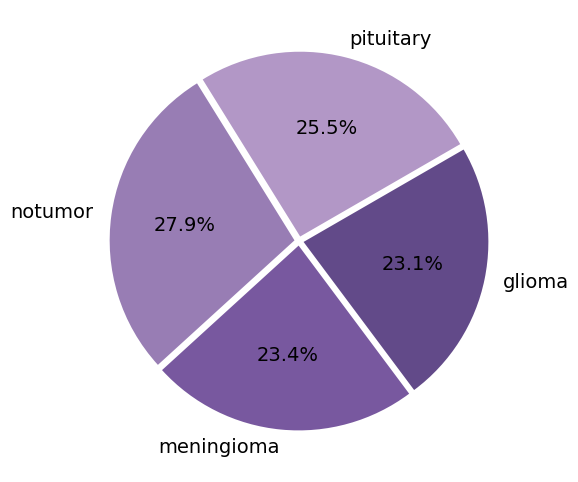

In [43]:
plt.figure(figsize=(14,6))
colors = ['#b297c6', '#987db4', '#78589f', '#624a89']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in train_labels if x=='pituitary']),
         len([x for x in train_labels if x=='notumor']),
         len([x for x in train_labels if x=='meningioma']),
         len([x for x in train_labels if x=='glioma'])],
        labels=['pituitary','notumor', 'meningioma', 'glioma'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30)

- #### Testing 🧷

In [44]:
test_paths = []
test_labels = []

for label in os.listdir(Testing):
    for image in os.listdir(Testing+label):
        test_paths.append(Testing+label+'/'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

- #### Plotting the images & the brain types

([<matplotlib.patches.Wedge at 0x25ae352e470>,
 [Text(-1.1477294392716355, 0.07222973230753062, 'Train'),
  Text(1.0978281528346907, -0.0690894119498146, 'Test')],
 [Text(-0.6487166395883155, 0.04082550086947383, '81.3%'),
  Text(0.5988153560916494, -0.03768513379080796, '18.7%')])

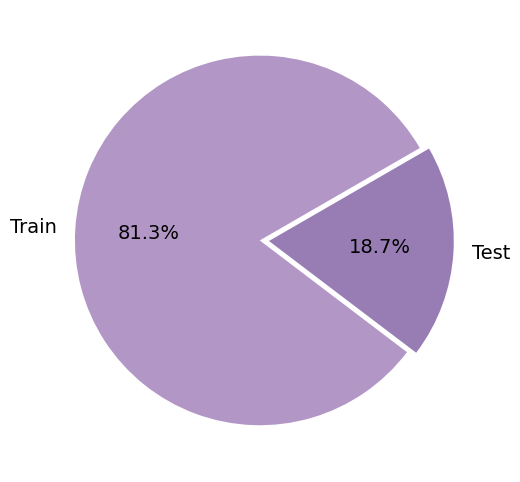

In [45]:
plt.figure(figsize=(14,6))
colors = ['#b297c6', '#987db4', '#78589f', '#624a89']
plt.rcParams.update({'font.size': 14})
plt.pie([len(train_labels), len(test_labels)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30)

- As we can observe around 80% is taken as training.

### Data Agu 🧷

- We consider brightness & constract & rotation

In [46]:
from PIL import Image, ImageEnhance
import random

In [47]:
#*****ops
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2)) #**
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image

In [48]:
# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img

- Plotting agumented MR images 

In [49]:
IMAGE_SIZE = 254 #***

def open_images(paths):
    '''
    Given a list of paths to images, this function returns the images as arrays (after augmenting them)
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)


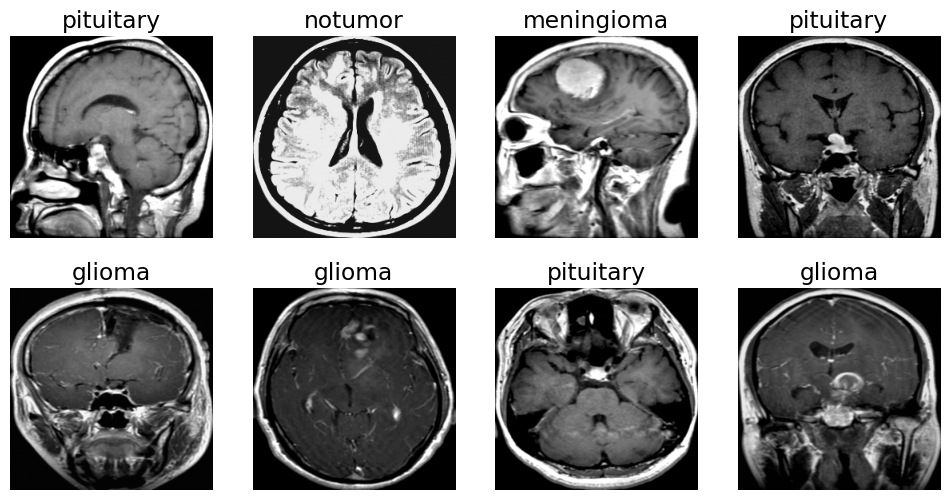

In [50]:
images = open_images(train_paths[50:59])
labels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()

#### Data Generator 🧷

- Given a list of paths to images, and the labels,<br>
this function augments the images, normalizes them,<br> encodes the label, and then returns the batch on which the model can train on.

In [51]:
unique_labels = os.listdir(Training)

def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)
#

In [52]:
def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels  

#### The VGG-16 Pre-trained Model 💻

In [53]:
base_model = VGG16(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

model = Sequential()
model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(unique_labels), activation='softmax'))

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_2 (Dropout)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 17,926,596
Trainable params: 10,291,332


In [55]:
from tensorflow import keras 

In [56]:
keras.utils.plot_model(model, show_shapes=True) #tryyy

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [57]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy']) 

In [58]:
#training 
batch_size = 20
steps = int(len(train_paths)/batch_size)
epochs = 8 #****************
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/8
285/285 [==============================] - 586s 2s/step - loss: 0.4462 - sparse_categorical_accuracy: 0.8328
Epoch 2/8
285/285 [==============================] - 612s 2s/step - loss: 0.1925 - sparse_categorical_accuracy: 0.9269
Epoch 3/8
285/285 [==============================] - 596s 2s/step - loss: 0.1054 - sparse_categorical_accuracy: 0.9617
Epoch 4/8
285/285 [==============================] - 594s 2s/step - loss: 0.0635 - sparse_categorical_accuracy: 0.9794
Epoch 5/8
285/285 [==============================] - 614s 2s/step - loss: 0.0585 - sparse_categorical_accuracy: 0.9784
Epoch 6/8
285/285 [==============================] - 606s 2s/step - loss: 0.0440 - sparse_categorical_accuracy: 0.9851
Epoch 7/8
285/285 [==============================] - 574s 2s/step - loss: 0.0374 - sparse_categorical_accuracy: 0.9877
Epoch 8/8
285/285 [==============================] - 562s 2s/step - loss: 0.0296 - sparse_categorical_accuracy: 0.9886


- 98.86% training accurcay!

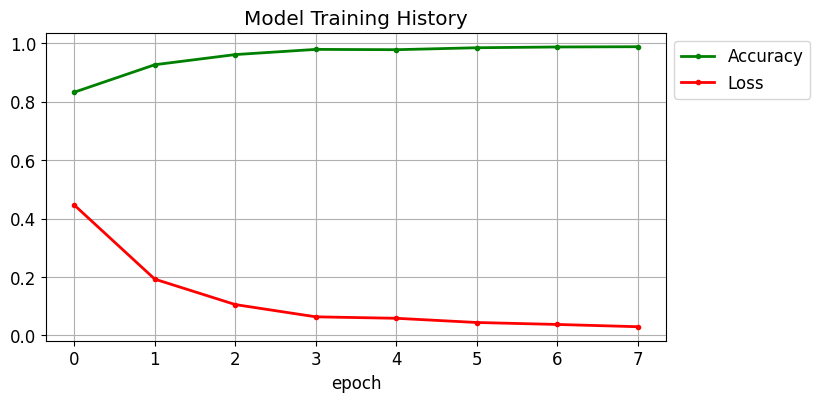

In [59]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [60]:
batch_size = 32
steps = int(len(test_paths)/batch_size)
y_pred = []
y_true = []
for x,y in tqdm(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1), total=steps):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

  0%|          | 0/40 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


  2%|▎         | 1/40 [00:02<01:55,  2.95s/it]

1/1 [==============================] - 2s 2s/step


  5%|▌         | 2/40 [00:05<01:44,  2.74s/it]

1/1 [==============================] - 2s 2s/step


  8%|▊         | 3/40 [00:08<01:39,  2.69s/it]

1/1 [==============================] - 2s 2s/step


 10%|█         | 4/40 [00:10<01:31,  2.53s/it]

1/1 [==============================] - 2s 2s/step


 12%|█▎        | 5/40 [00:12<01:26,  2.47s/it]

1/1 [==============================] - 2s 2s/step


 15%|█▌        | 6/40 [00:15<01:22,  2.42s/it]

1/1 [==============================] - 2s 2s/step


 18%|█▊        | 7/40 [00:17<01:19,  2.40s/it]

1/1 [==============================] - 2s 2s/step


 20%|██        | 8/40 [00:19<01:15,  2.37s/it]

1/1 [==============================] - 2s 2s/step


 22%|██▎       | 9/40 [00:22<01:13,  2.37s/it]

1/1 [==============================] - 2s 2s/step


 25%|██▌       | 10/40 [00:24<01:11,  2.37s/it]

1/1 [==============================] - 2s 2s/step


 28%|██▊       | 11/40 [00:26<01:08,  2.36s/it]

1/1 [==============================] - 2s 2s/step


 30%|███       | 12/40 [00:29<01:06,  2.36s/it]

1/1 [==============================] - 2s 2s/step


 32%|███▎      | 13/40 [00:31<01:03,  2.36s/it]

1/1 [==============================] - 2s 2s/step


 35%|███▌      | 14/40 [00:33<01:01,  2.35s/it]

1/1 [==============================] - 2s 2s/step


 38%|███▊      | 15/40 [00:36<00:59,  2.36s/it]

1/1 [==============================] - 2s 2s/step


 40%|████      | 16/40 [00:38<00:56,  2.34s/it]

1/1 [==============================] - 2s 2s/step


 42%|████▎     | 17/40 [00:41<00:54,  2.36s/it]

1/1 [==============================] - 2s 2s/step


 45%|████▌     | 18/40 [00:43<00:51,  2.36s/it]

1/1 [==============================] - 2s 2s/step


 48%|████▊     | 19/40 [00:45<00:49,  2.37s/it]

1/1 [==============================] - 2s 2s/step


 50%|█████     | 20/40 [00:48<00:47,  2.37s/it]

1/1 [==============================] - 2s 2s/step


 52%|█████▎    | 21/40 [00:50<00:45,  2.37s/it]

1/1 [==============================] - 2s 2s/step


 55%|█████▌    | 22/40 [00:52<00:42,  2.38s/it]

1/1 [==============================] - 2s 2s/step


 57%|█████▊    | 23/40 [00:55<00:40,  2.38s/it]

1/1 [==============================] - 2s 2s/step


 60%|██████    | 24/40 [00:57<00:38,  2.38s/it]

1/1 [==============================] - 2s 2s/step


 62%|██████▎   | 25/40 [01:00<00:36,  2.40s/it]

1/1 [==============================] - 2s 2s/step


 65%|██████▌   | 26/40 [01:02<00:33,  2.39s/it]

1/1 [==============================] - 2s 2s/step


 68%|██████▊   | 27/40 [01:05<00:31,  2.43s/it]

1/1 [==============================] - 2s 2s/step


 70%|███████   | 28/40 [01:07<00:29,  2.45s/it]

1/1 [==============================] - 2s 2s/step


 72%|███████▎  | 29/40 [01:10<00:27,  2.46s/it]

1/1 [==============================] - 2s 2s/step


 75%|███████▌  | 30/40 [01:12<00:24,  2.47s/it]

1/1 [==============================] - 2s 2s/step


 78%|███████▊  | 31/40 [01:14<00:22,  2.46s/it]

1/1 [==============================] - 2s 2s/step


 80%|████████  | 32/40 [01:17<00:19,  2.49s/it]

1/1 [==============================] - 3s 3s/step


 82%|████████▎ | 33/40 [01:20<00:18,  2.58s/it]

1/1 [==============================] - 3s 3s/step


 85%|████████▌ | 34/40 [01:23<00:15,  2.63s/it]

1/1 [==============================] - 3s 3s/step


 88%|████████▊ | 35/40 [01:26<00:14,  2.81s/it]

1/1 [==============================] - 2s 2s/step


 90%|█████████ | 36/40 [01:28<00:10,  2.69s/it]

1/1 [==============================] - 3s 3s/step


 92%|█████████▎| 37/40 [01:31<00:08,  2.78s/it]

1/1 [==============================] - 3s 3s/step


 95%|█████████▌| 38/40 [01:34<00:05,  2.85s/it]

1/1 [==============================] - 2s 2s/step


 98%|█████████▊| 39/40 [01:37<00:02,  2.81s/it]

1/1 [==============================] - 2s 2s/step


100%|██████████| 40/40 [01:39<00:00,  2.70s/it]

1/1 [==============================] - 3s 3s/step


41it [01:42,  2.50s/it]                        


In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

      glioma       0.96      0.95      0.96       300
  meningioma       0.96      0.94      0.95       306
     notumor       0.97      1.00      0.99       405
   pituitary       0.97      0.95      0.96       300

    accuracy                           0.97      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.97      0.97      0.97      1311



#### Saving model 💾

In [32]:
model.save('brainTumor98.h5')

### Real implementation  🔩

In [10]:
import tensorflow.keras as keras

In [11]:
from keras.models import load_model
import keras.utils as image
import numpy as np
import matplotlib.pyplot as plt
img = image.load_img('Tr-me_1318.jpg', 0,target_size=(254,254))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)#*

In [12]:
save_model = load_model('brain_VGG16.h5')
result = save_model.predict(x)
print (result)

1/1 [==============================] - 2s 2s/step
[[0. 1. 0. 0.]]


meningioma


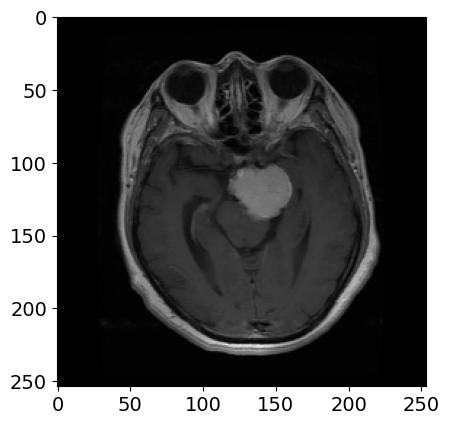

In [13]:
if result[0][0] == 1:
    prediction = 'glioma'
elif result[0][1]  == 1:
    prediction = 'meningioma'
elif result[0][2]  == 1:
    prediction = 'notumor'
else:
    prediction = 'pituitary'

print (prediction)

plt.imshow(img)

### END ✔️